<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%89%E1%85%B5_%E1%84%89%E1%85%A1%E1%86%BC%E1%84%80%E1%85%AF%E1%86%AB%E1%84%86%E1%85%A2%E1%84%8E%E1%85%AE%E1%86%AF_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서울시 상권 매출 데이터
### 데이터 링크 : https://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [ ]:
# 한글 폰트 적용
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df2021 = pd.read_csv("../Downloads/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv"
                   ,sep=',',encoding = "euc-kr")
df2021.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,59,41,10,13,13,11,12,19,22,0,9,36,20,34,1,69,31,0,3,8,18,35,35,367617856,259233535,61118890,81581781,81220388,70924228,72772569,119982725,139250810,0,57482800,224163545,126862515,210166638,8175893,369379103,168952823,934858,18452459,43587171,97353617,189319007,188684816,16355,9147,3208,3397,3589,3073,3088,4511,4636,0,2988,10420,4978,6959,157,15667,7253,108,1098,2013,4344,7792,7568,28
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,50,50,7,12,9,13,9,26,24,9,31,35,22,3,0,57,43,0,4,9,23,43,21,61070094,61887044,8611528,15264108,10629354,15464848,11100256,32014369,29872675,11373269,37723773,43587908,26677599,3594589,0,64010667,47678846,251721,4661073,10112557,25115187,48256159,23292816,6435,5604,1120,1319,1463,1164,1369,2809,2795,289,4245,5060,1893,552,0,6679,4293,52,926,1222,2698,3404,2670,9


In [ ]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140830 entries, 0 to 140829
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          140830 non-null  int64 
 1   기준_분기_코드         140830 non-null  int64 
 2   상권_구분_코드         140830 non-null  object
 3   상권_구분_코드_명       140830 non-null  object
 4   상권_코드            140830 non-null  int64 
 5   상권_코드_명          140830 non-null  object
 6   서비스_업종_코드        140830 non-null  object
 7   서비스_업종_코드_명      140830 non-null  object
 8   분기당_매출_금액        140830 non-null  int64 
 9   분기당_매출_건수        140830 non-null  int64 
 10  주중_매출_비율         140830 non-null  int64 
 11  주말_매출_비율         140830 non-null  int64 
 12  월요일_매출_비율        140830 non-null  int64 
 13  화요일_매출_비율        140830 non-null  int64 
 14  수요일_매출_비율        140830 non-null  int64 
 15  목요일_매출_비율        140830 non-null  int64 
 16  금요일_매출_비율        140830 non-null  int64 
 17  토요일_매출_비율 

<Axes: xlabel='상권_구분_코드_명', ylabel='count'>

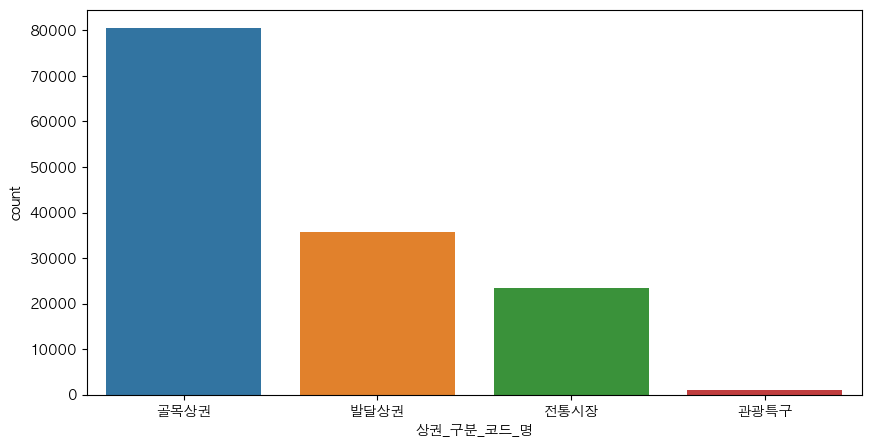

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df2021['상권_구분_코드_명'])

In [ ]:
service=df2021.groupby('서비스_업종_코드_명').agg({'기준_년_코드':'count', '점포수':sum},as_index=False).reset_index()
service.columns=['서비스_업종','개수','점포수']

<Axes: xlabel='서비스_업종', ylabel='점포수'>

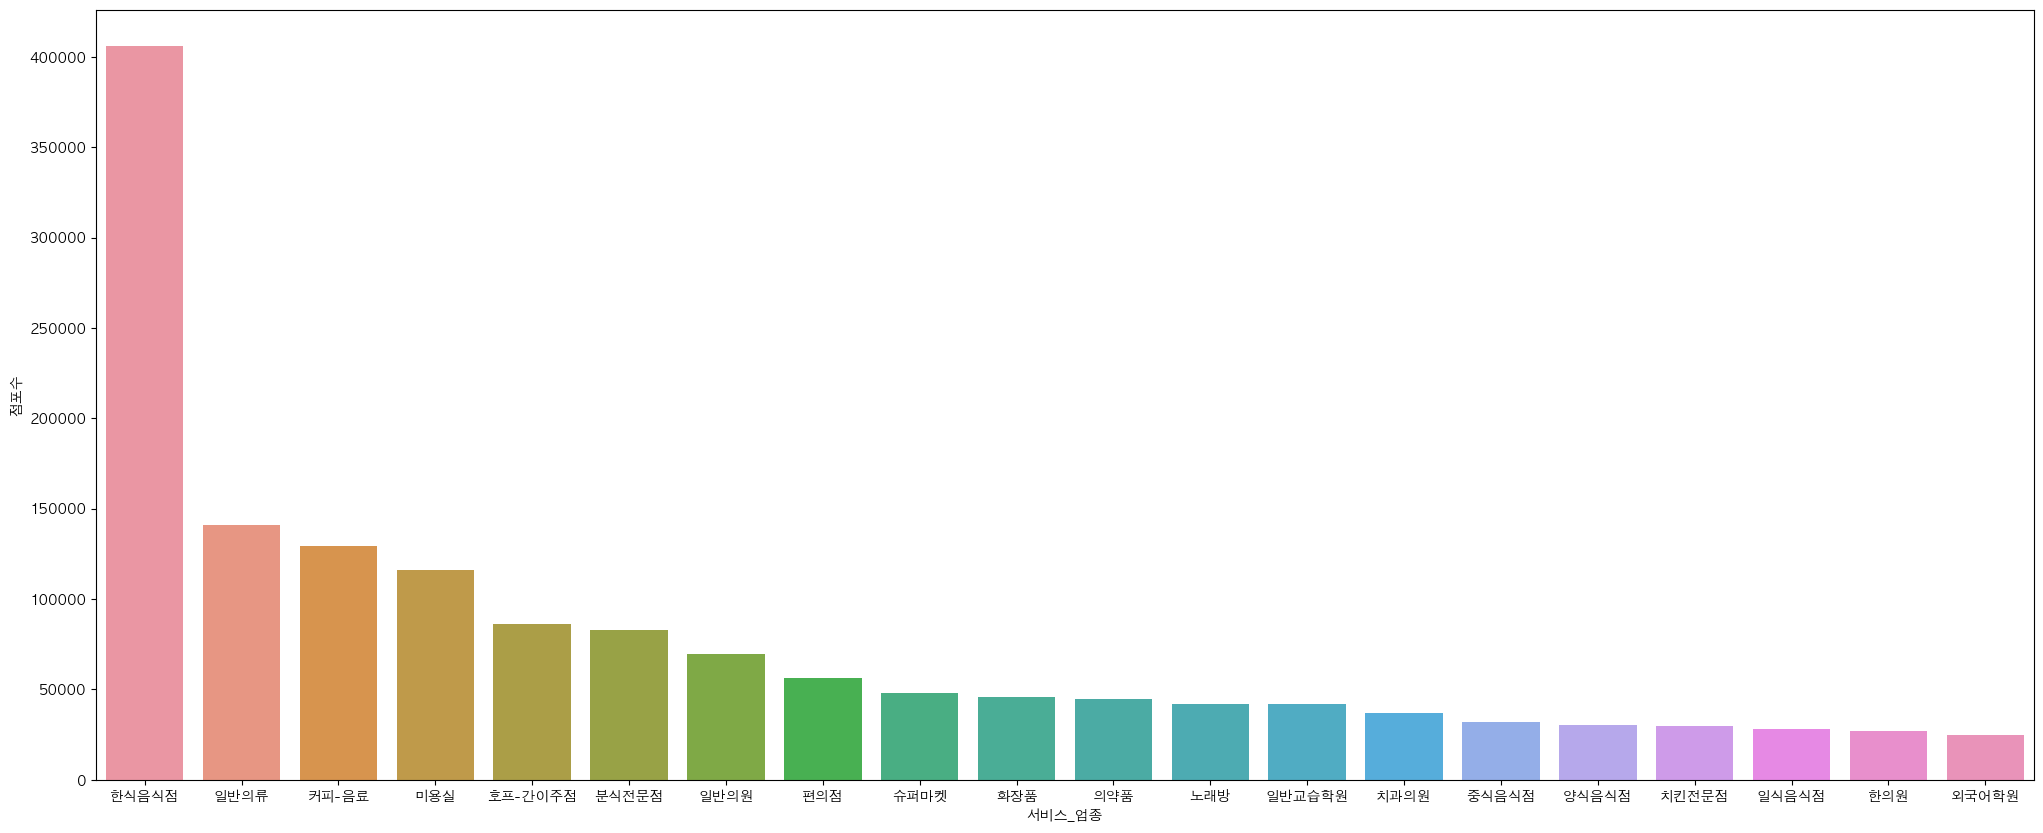

In [ ]:
service=service.sort_values('점포수',ascending=False).iloc[:20]

plt.figure(figsize=(25,10))
sns.barplot(x=service['서비스_업종'],y=service['점포수'])

<Axes: >

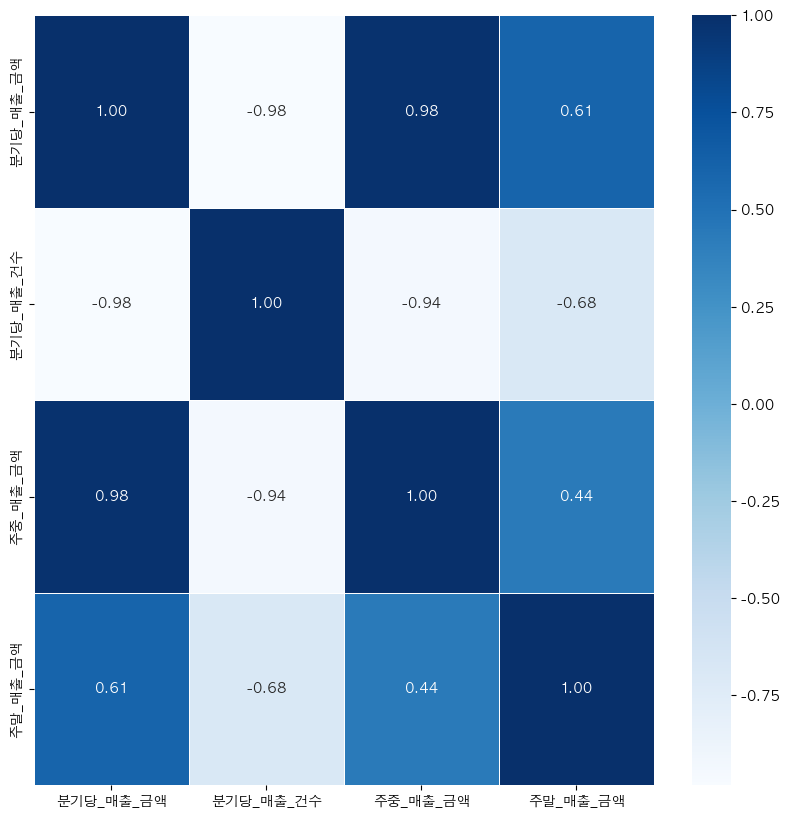

In [ ]:
all=df2021[['분기당_매출_금액','분기당_매출_건수','주중_매출_금액','주말_매출_금액']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = all.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

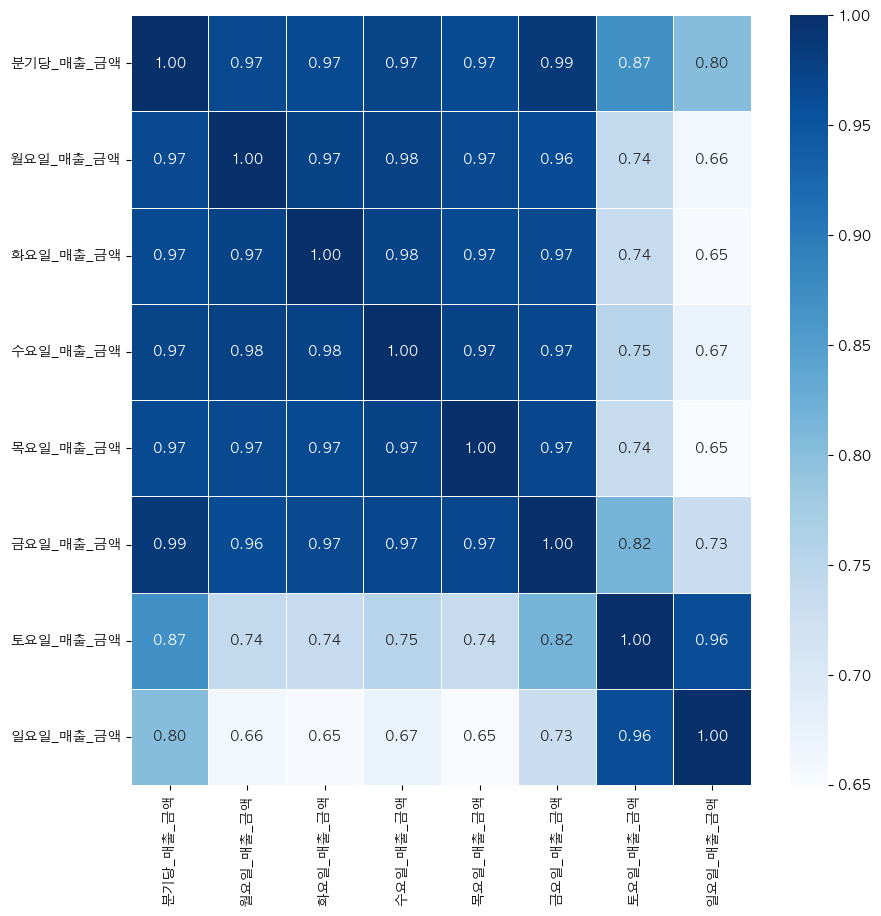

In [ ]:
week=df2021[['분기당_매출_금액','월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액'
       ,'토요일_매출_금액','일요일_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = week, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

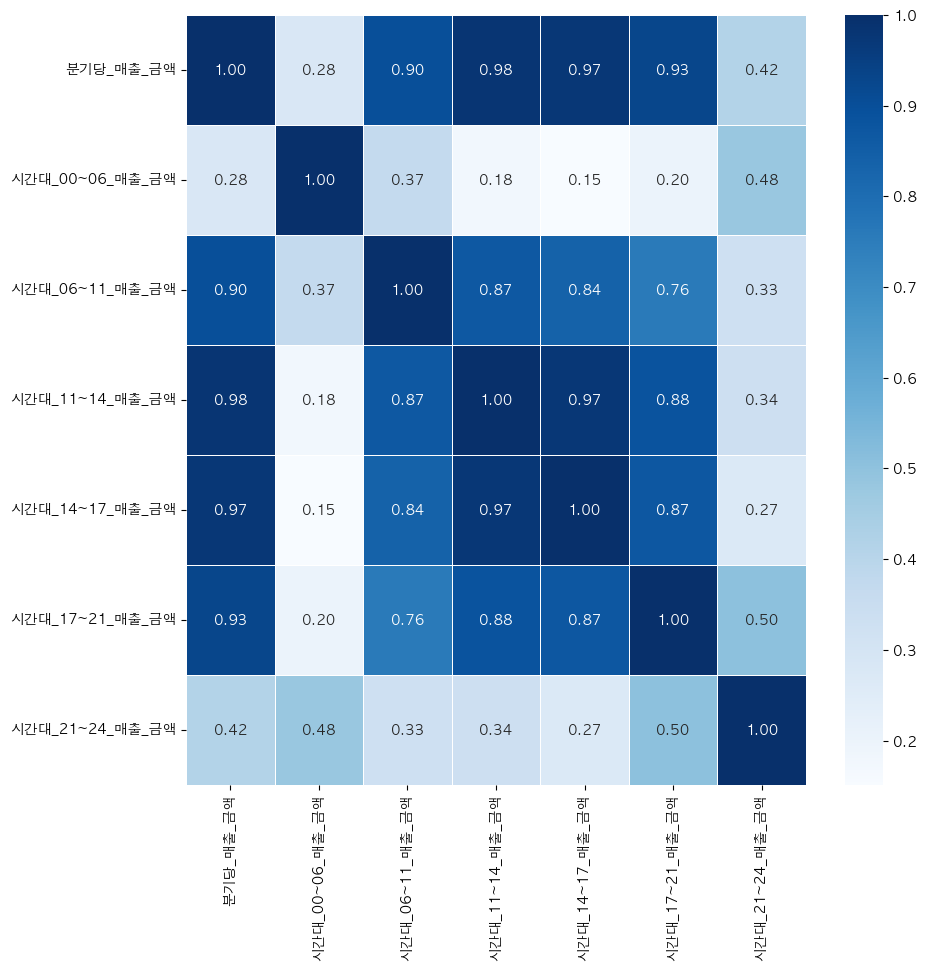

In [ ]:
time=df2021[['분기당_매출_금액','시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액'
            ,'시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = time, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

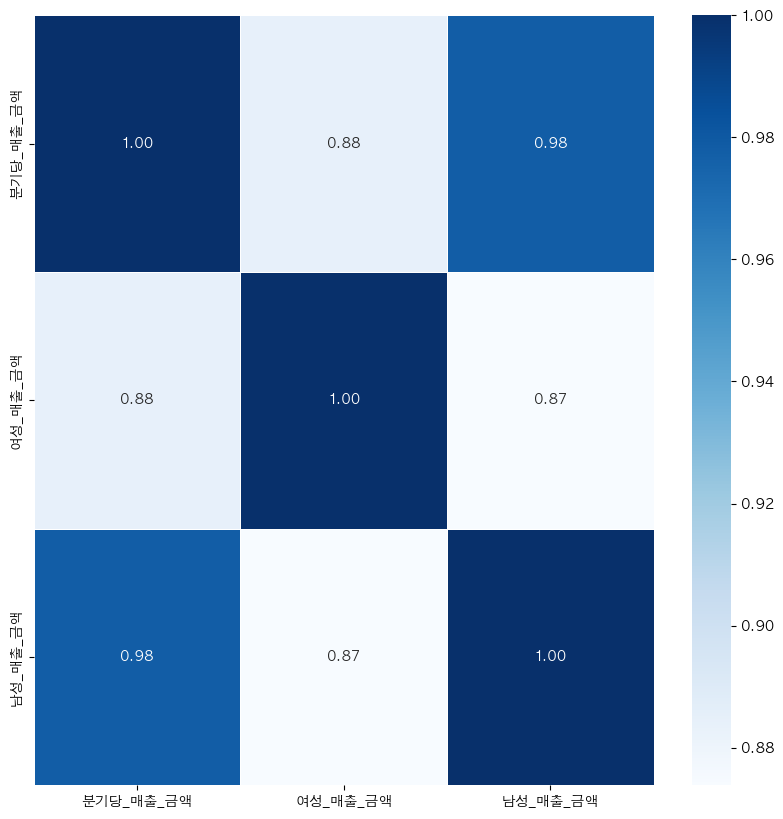

In [ ]:
gender=df2021[['분기당_매출_금액','여성_매출_금액','남성_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

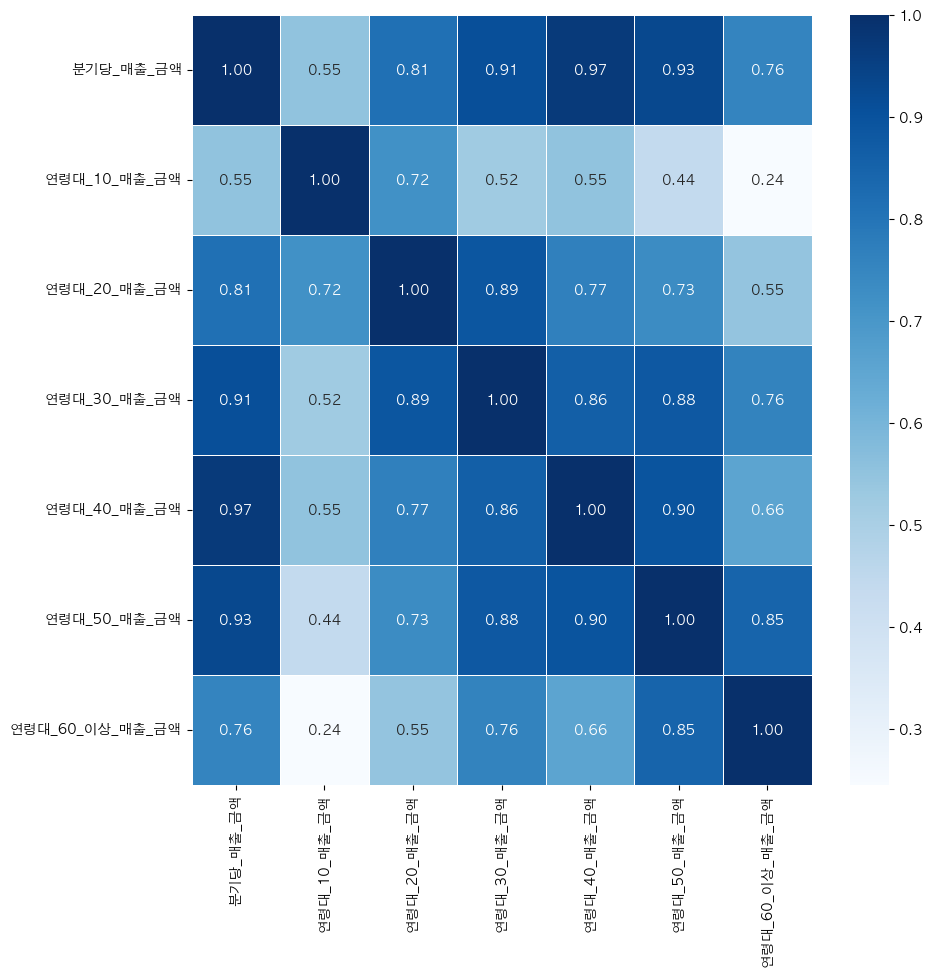

In [ ]:
age=df2021[['분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액'
           ,'연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = age, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

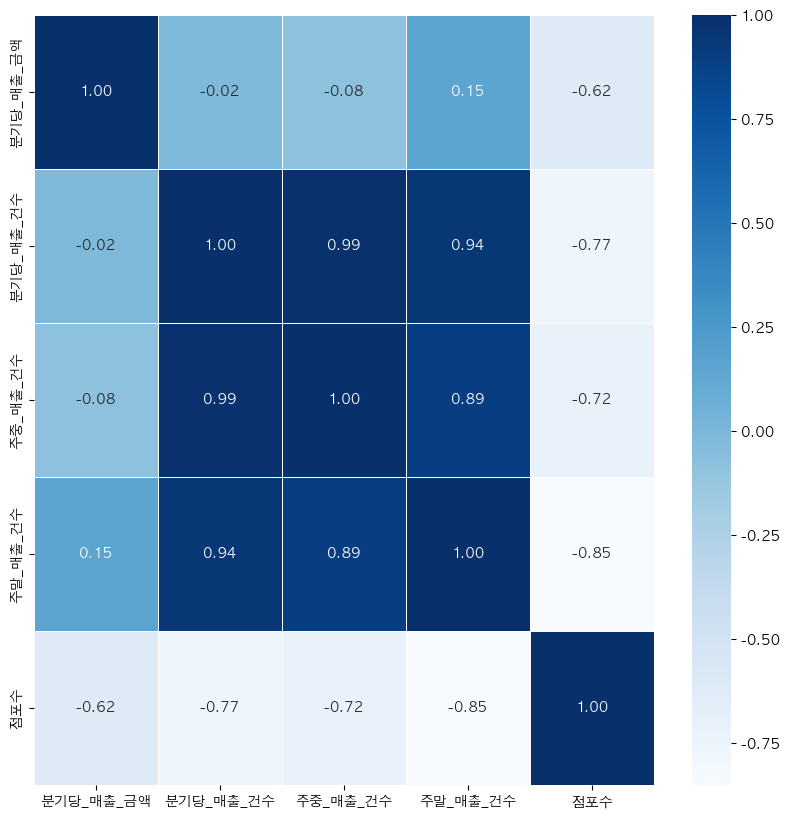

In [ ]:
all2=df2021[['분기당_매출_금액','분기당_매출_건수','주중_매출_건수','주말_매출_건수','점포수']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = all2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

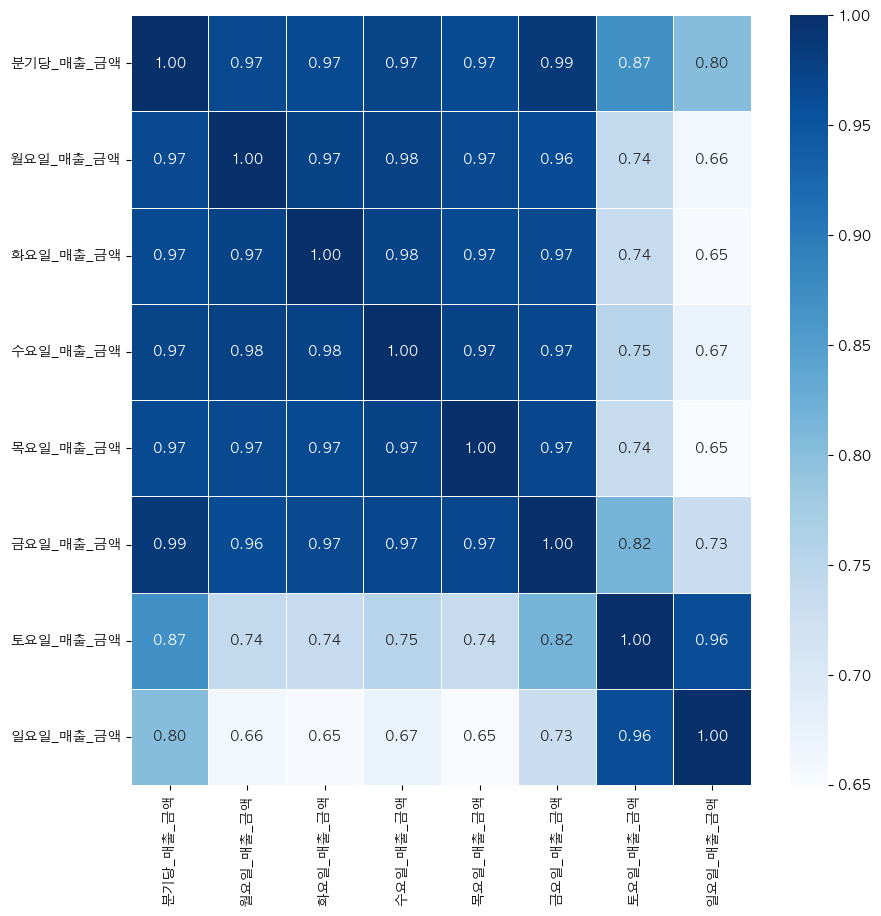

In [ ]:
week2=df2021[['분기당_매출_금액','월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수','금요일_매출_건수'
       ,'토요일_매출_건수','일요일_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = week, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

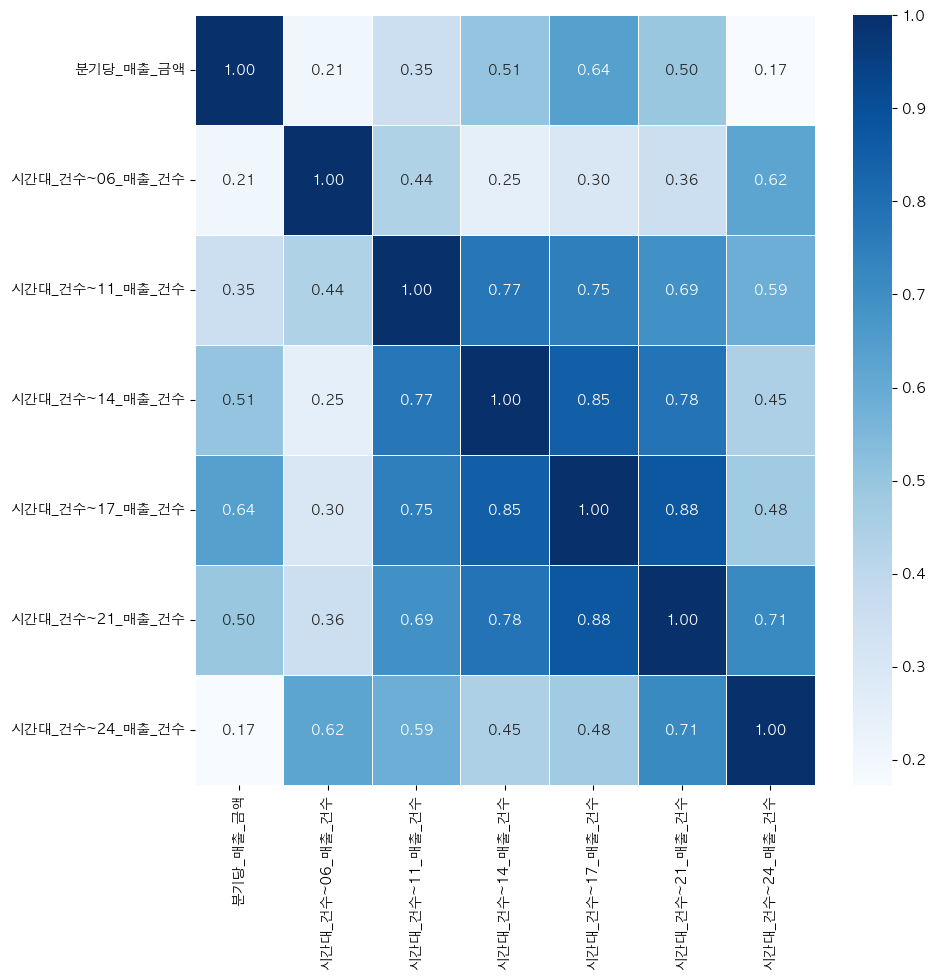

In [ ]:
time2=df2021[['분기당_매출_금액','시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수'
            ,'시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = time2, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

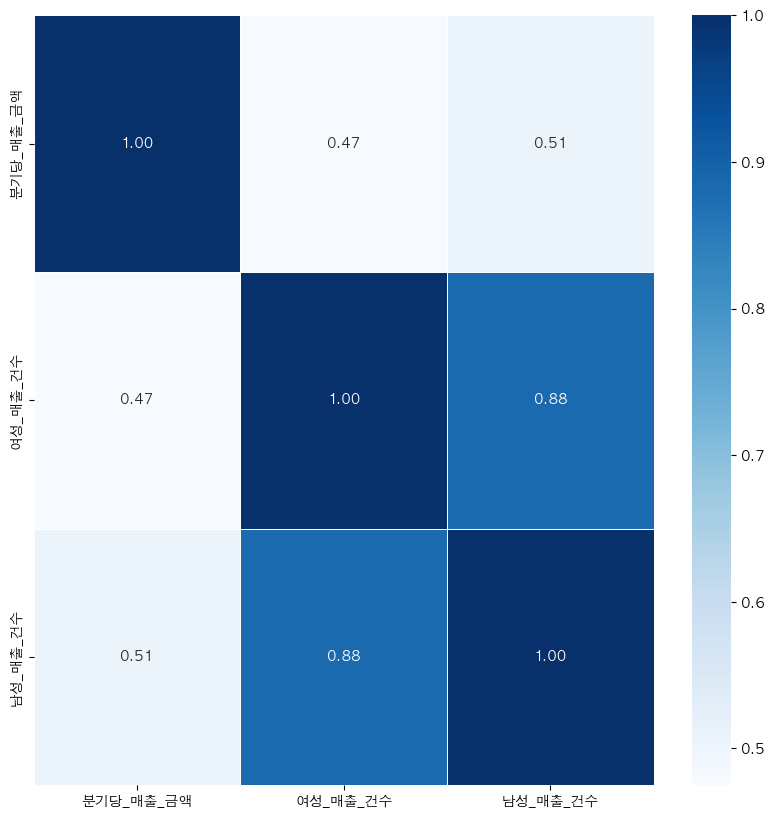

In [ ]:
gender=df2021[['분기당_매출_금액','여성_매출_건수','남성_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

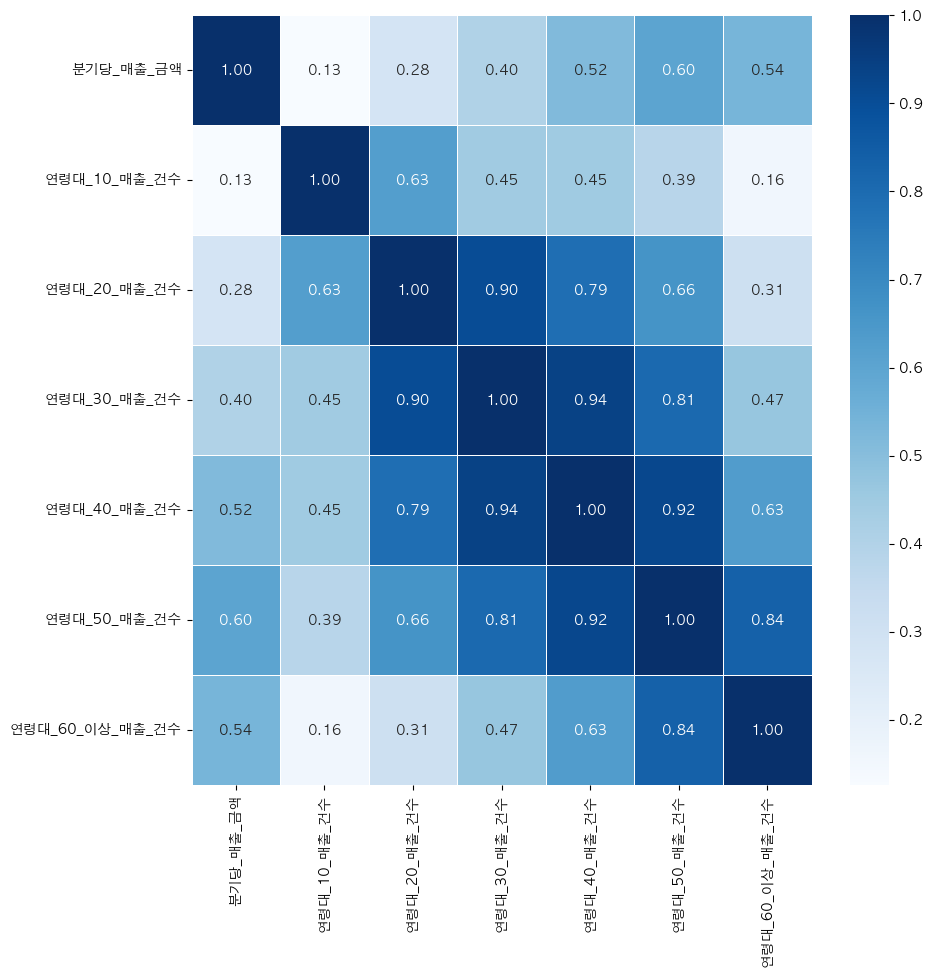

In [ ]:
age2=df2021[['분기당_매출_금액','연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수'
           ,'연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = age2, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
X=df2021[[ '분기당_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
       '토요일_매출_건수', '시간대_건수~17_매출_건수',
      '연령대_50_매출_건수']]

y=df2021['분기당_매출_금액']

In [ ]:
X.columns=[['cnt','weekday_amt','weekend_amt','mon_amt','tue_amt','wed_amt','thu_amt','fri_amt','sat_amt','sun_amt','0611_amt','1114_amt',
           '1417_amt','1721_amt','man_amt','woman_amt','20_amt','30_amt','40_amt','50_amt','60_amt','sat_cnt','1417_cnt','50_cnt']]

### 다중회귀분석을 들어가기 전, 회귀분석에서는 종속변수 간의 상관관계가 분석에 좋지 않은 영향을 줍니다. 이를 다중공선성이라고 합니다.
### 다중공선성이 있을 경우, 제거를 해야 하기에 있는지 확인해보았습니다.

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pd.options.display.float_format = '{:.5f}'.format


vif=pd.DataFrame()
vif['features']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF Factor']=X.columns

vif=vif.sort_values('features').reset_index(drop=True)
vif

,features,VIF Factor
0,-0.33361,"(woman_amt,)"
1,-0.24031,"(60_amt,)"
2,-0.14635,"(30_amt,)"
3,-0.01142,"(40_amt,)"
4,-0.00103,"(0611_amt,)"
5,-0.00005,"(1417_amt,)"
6,-0.00002,"(1721_amt,)"
7,0.00055,"(1114_amt,)"
8,0.02134,"(50_amt,)"
9,0.21315,"(20_amt,)"


### 보통 10 이상이면 다중공선성이 있다고 판단하는데 모든 변수가 10 이상이기 때문에 이를 해결해주어야 합니다.
### 해결 방법으로 다중공선성이 있는 칼럼을 제거하는 방법도 있는데, 여기서는 모든 칼럼이 있기에 제거하는 방법은 불가능합니다. 그래서 저는 주성분 분석을 해보기로 하였습니다.
### 우선 주성분 분석을 하기 전 값들을 표준화해주어야 합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_sca = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_sca)
pcadf = pd.DataFrame(data=printcipalComponents)
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
pcadf.head()

,0,1,2,3,4
0,0.02001,-0.15686,0.05181,0.12099,-0.14101
1,-0.40845,0.02947,0.05150,0.06890,-0.05547
2,-0.57574,0.22529,0.13953,0.04691,-0.01891
3,-0.56138,0.20697,0.12592,0.04414,-0.01956
4,-0.55630,0.23994,0.13398,0.04701,-0.01901


In [ ]:
sum(pca.explained_variance_ratio_)

0.9727387548519383

## 다중회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

lr=LinearRegression()

In [ ]:
# 회귀분석을 하기 위한 B_0, 상수항 추가
pcadf = sm.add_constant(pcadf, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(y,pcadf)
model2 = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              분기당_매출_금액   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.280e+07
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:12:07   Log-Likelihood:            -2.9079e+06
No. Observations:              140830   AIC:                         5.816e+06
Df Residuals:                  140824   BIC:                         5.816e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.605e+08   5.98e+05   1103.775      0.000    6.59e+08    6.62e+08
0           1.439e+09   1.37e+05   1.05e+04      0.000    1.44e+09    1.44e+09
1           7.404e+08   3.77e+05   1961.721      0.000     7.4e+08    7.41e+08
2          -1.323e+08   6.11e+05   -216.721      0.000   -1.34e+08   -1.31e+08
3          -5.321e+06   7.68e+05     -6.925      0.000   -6.83e+06   -3.82e+06
4          -4.507e+08    1.2e+06   -374.801      0.000   -4.53e+08   -4.48e+08
==============================================================================
Omnibus:                   262973.163   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      52252724252.291
Skew:                          12.441   Prob(JB):                         0.00
Kurtosis:                    2986.990   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 회귀분석을 하기 위한 B_0, 상수항 추가
X = sm.add_constant(X, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(y,X)
model1 = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              분기당_매출_금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.955e+32
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:12:22   Log-Likelihood:             1.3377e+06
No. Observations:              140830   AIC:                        -2.675e+06
Df Residuals:                  140807   BIC:                        -2.675e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              9.76e-07   5.07e-08     19.256      0.000    8.77e-07    1.08e-06
('cnt',)         -5.068e-12   2.31e-12     -2.195      0.028   -9.59e-12   -5.43e-13
('weekday_amt',)     0.8333   2.27e-15   3.66e+14      0.000       0.833       0.833
('weekend_amt',)     0.6667   3.46e-15   1.93e+14      0.000       0.667       0.667
('mon_amt',)         0.1667   2.29e-15   7.27e+13      0.000       0.167       0.167
('tue_amt',)         0.1667   2.28e-15    7.3e+13      0.000       0.167       0.167
('wed_amt',)         0.1667   2.29e-15   7.29e+13      0.000       0.167       0.167
('thu_amt',)         0.1667   2.27e-15   7.33e+13      0.000       0.167       0.167
('fri_amt',)         0.1667   2.28e-15   7.32e+13      0.000       0.167       0.167
('sat_amt',)         0.3333   3.49e-15   9.56e+13      0.000       0.333       0.333
('sun_amt',)         0.3333   3.51e-15   9.49e+13      0.000       0.333       0.333
('0611_amt',)     -4.97e-16   2.39e-16     -2.077      0.038   -9.66e-16    -2.8e-17
('1114_amt',)     9.502e-16   1.97e-16      4.825      0.000    5.64e-16    1.34e-15
('1417_amt',)    -2.406e-16   1.79e-16     -1.341      0.180   -5.92e-16    1.11e-16
('1721_amt',)     2.848e-15   2.37e-16     12.036      0.000    2.38e-15    3.31e-15
('man_amt',)      1.978e-14   3.73e-15      5.304      0.000    1.25e-14    2.71e-14
('woman_amt',)    4.348e-14   3.73e-15     11.648      0.000    3.62e-14    5.08e-14
('20_amt',)      -6.842e-14   3.91e-15    -17.498      0.000   -7.61e-14   -6.08e-14
('30_amt',)      -2.066e-14   3.67e-15     -5.633      0.000   -2.78e-14   -1.35e-14
('40_amt',)      -3.861e-14   3.76e-15    -10.275      0.000    -4.6e-14   -3.12e-14
('50_amt',)      -4.328e-15   3.73e-15     -1.159      0.246   -1.16e-14    2.99e-15
('60_amt',)      -3.995e-14   3.73e-15    -10.713      0.000   -4.73e-14   -3.26e-14
('sat_cnt',)     -2.811e-11   1.34e-11     -2.097      0.036   -5.44e-11   -1.84e-12
('1417_cnt',)    -7.129e-11   9.28e-12     -7.685      0.000   -8.95e-11   -5.31e-11
('50_cnt',)       9.953e-11   1.26e-11      7.871      0.000    7.47e-11    1.24e-10
==============================================================================
Omnibus:                   353925.104   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16570663203.587
Skew:                         -27.319   Prob(JB):                         0.00
Kurtosis:                    1682.571   Cond. No.                     6.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+16. This might indicate that there are
strong multicollinearity or other numerical probl

## 외식업 군집분석

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
food=df2021[(df2021['서비스_업종_코드_명']=='한식음식점')|
(df2021['서비스_업종_코드_명']=='중식음식점')|
(df2021['서비스_업종_코드_명']=='일식음식점')|
(df2021['서비스_업종_코드_명']=='양식음식점')|
(df2021['서비스_업종_코드_명']=='제과점')|
(df2021['서비스_업종_코드_명']=='패스트푸드점')|
(df2021['서비스_업종_코드_명']=='치킨전문점')|
(df2021['서비스_업종_코드_명']=='분식전문점')|
(df2021['서비스_업종_코드_명']=='호프-간이주점')|
(df2021['서비스_업종_코드_명']=='커피-음료')
]

In [ ]:
food2=food.groupby('서비스_업종_코드_명',as_index=False).sum()
food2.drop(['서비스_업종_코드_명'],axis=1,inplace=True)
food2.drop(['기준_년_코드'],axis=1,inplace=True)
food2.drop(['기준_분기_코드'],axis=1,inplace=True)
food2.drop(['상권_코드'],axis=1,inplace=True)

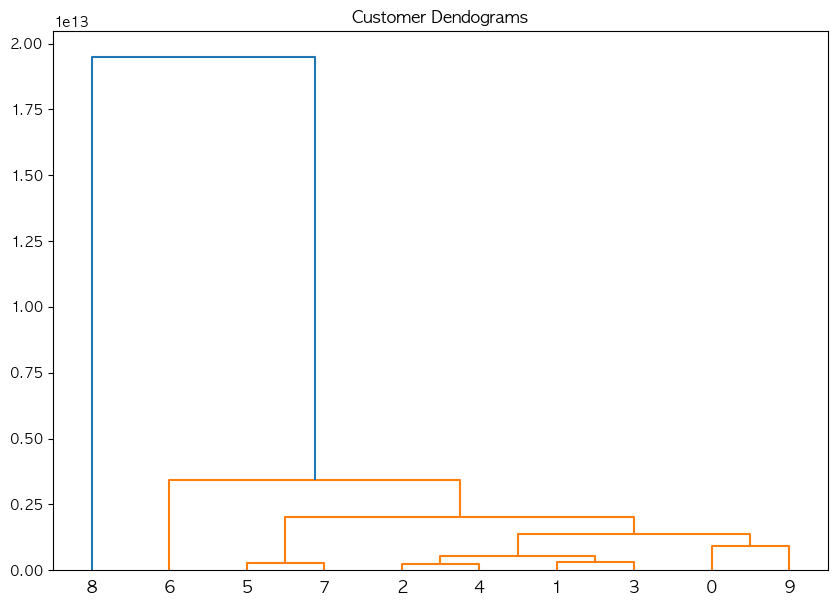

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(food2, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(food2)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
retail=df2021[(df2021['서비스_업종_코드_명']=='슈퍼마켓')|
(df2021['서비스_업종_코드_명']=='편의점')|
(df2021['서비스_업종_코드_명']=='컴퓨터및주변장치판매')|
(df2021['서비스_업종_코드_명']=='핸드폰')|
(df2021['서비스_업종_코드_명']=='미곡판매')|
(df2021['서비스_업종_코드_명']=='육류판매')|
(df2021['서비스_업종_코드_명']=='수산물판매')|
(df2021['서비스_업종_코드_명']=='청과상')|
(df2021['서비스_업종_코드_명']=='반찬가게')|
(df2021['서비스_업종_코드_명']=='일반의류')|
(df2021['서비스_업종_코드_명']=='신발')|
(df2021['서비스_업종_코드_명']=='가방') |
(df2021['서비스_업종_코드_명']=='안경')|                
(df2021['서비스_업종_코드_명']=='시계및귀금속') |
(df2021['서비스_업종_코드_명']=='의약품') |
(df2021['서비스_업종_코드_명']=='의료기기')| 
(df2021['서비스_업종_코드_명']=='서적') |
(df2021['서비스_업종_코드_명']=='문구') |
(df2021['서비스_업종_코드_명']=='화장품')| 
(df2021['서비스_업종_코드_명']=='운동/경기용품') |
(df2021['서비스_업종_코드_명']=='자전거 및 기타운송장비')|
              (df2021['서비스_업종_코드_명']=='완구')|
             (df2021['서비스_업종_코드_명']=='섬유제품')|
             (df2021['서비스_업종_코드_명']=='화초')|
             (df2021['서비스_업종_코드_명']=='애완동물')|
             (df2021['서비스_업종_코드_명']=='가구')|
             (df2021['서비스_업종_코드_명']=='가전제품')|
             (df2021['서비스_업종_코드_명']=='철물점')|
             (df2021['서비스_업종_코드_명']=='인테리어')|
             (df2021['서비스_업종_코드_명']=='조명용품')|
             (df2021['서비스_업종_코드_명']=='전자상거래업')]

In [ ]:
retail2=retail.groupby('서비스_업종_코드_명',as_index=False).sum()
retail2.drop(['서비스_업종_코드_명'],axis=1,inplace=True)
retail2.drop(['기준_년_코드'],axis=1,inplace=True)
retail2.drop(['기준_분기_코드'],axis=1,inplace=True)
retail2.drop(['상권_코드'],axis=1,inplace=True)

retail3=retail.groupby('서비스_업종_코드_명',as_index=False).sum()
retail3

,서비스_업종_코드_명,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,가구,2136197,2606,2212121028,1068299922057,3066517,74179,31590,15973,14558,15546,14241,13986,18210,13418,0,7505,28731,43409,25791,409,45183,60606,36,5051,13389,19132,32745,35528,694857637697,373442284360,138368301944,127328685596,145455238654,137957145448,145748266055,201782169965,171660114395,0,67758318053,294380279040,457324177645,244578717276,4258430043,458789257344,522883745684,214667933,42356564513,167483639336,238992177839,286973037921,245652082630,2337500,729017,462208,456011,483997,471990,463294,442252,286765,0,564356,940564,1086496,469492,5609,1397933,1391924,8939,351671,646350,635574,657593,489736,6675
1,가방,978164,1199,1001331565,236637089593,4450196,34801,13636,6350,6268,7253,7505,7492,8394,5262,61,2580,13112,18638,13017,1068,19337,29113,319,5840,7434,7223,13189,14493,157408699628,79228389965,29643426865,27917119607,30125108702,31767998789,37955045665,44616557731,34611832234,315669983,5055179311,57726193672,91967973849,78284153899,3287918879,82616847401,140503807684,1181719256,39879510868,58510154950,39653278489,44397529245,39498462264,2903870,1546326,553521,554580,570284,581041,644444,841698,704628,2020,175084,1069657,1489670,1605168,108597,1426820,2919627,71384,1071064,950314,742335,748343,762992,4945
2,가전제품,1335881,1642,1377319549,1330840310874,3923521,51470,14670,10284,9621,10860,9834,10953,8986,5710,1,6883,18718,24362,15671,559,35889,30277,121,3848,9452,11819,19285,21680,844822663859,486017647015,200082878459,152414143950,166783541021,153729974642,171812125787,255933479528,230084167487,3364730706,79643376320,357294434964,485241089934,390453858469,14842820481,674446615727,552971972319,1027172496,69659861578,243235610276,324114263377,325281097575,264100582736,2615749,1307772,597051,460626,518912,502819,536341,692059,615713,14454,403413,1004370,1361585,1086923,52776,2135279,1568103,13601,388903,718420,839565,905388,837485,4903
3,문구,4165281,5135,4335964991,1563094375955,54684287,179117,27167,34396,37670,36625,36534,34350,17758,9416,58,25032,58316,74221,46953,1958,102505,103796,4516,26432,42681,56321,43486,33191,1400747023044,162347352911,256045442632,293887130794,300193982589,287017083407,263603383622,109557817576,52789535335,206803512,234160231978,488829770999,604924553963,225133644195,9839371308,386550684075,346338452996,9358851452,89686340026,131555031162,198122004701,169884806997,134282496594,43967975,10716312,8538770,8648285,9170290,8914291,8696339,6764380,3951932,6181,6214822,16356768,18702111,12796568,607837,21204325,23172004,1376315,8728860,10061276,12282223,7162286,4765464,12926
4,미곡판매,2004832,2460,2089993619,530448911335,10766425,80671,18639,16270,15580,16497,15852,16603,13118,5546,535,16814,25376,33008,22386,1274,43453,55846,63,3780,8153,13613,23360,50395,440729527173,89719384162,84403300117,90520074281,88522089177,85851380571,91432683027,70095760727,19623623435,22418438566,168043359351,141616489987,138571190143,55758136198,4041297090,208883861304,281188631018,151170167,11765902689,37097603740,75334164962,133137641048,232586009667,8303769,2462656,1702687,1542738,1654916,1717308,1686120,1709816,752840,337658,22813

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1])

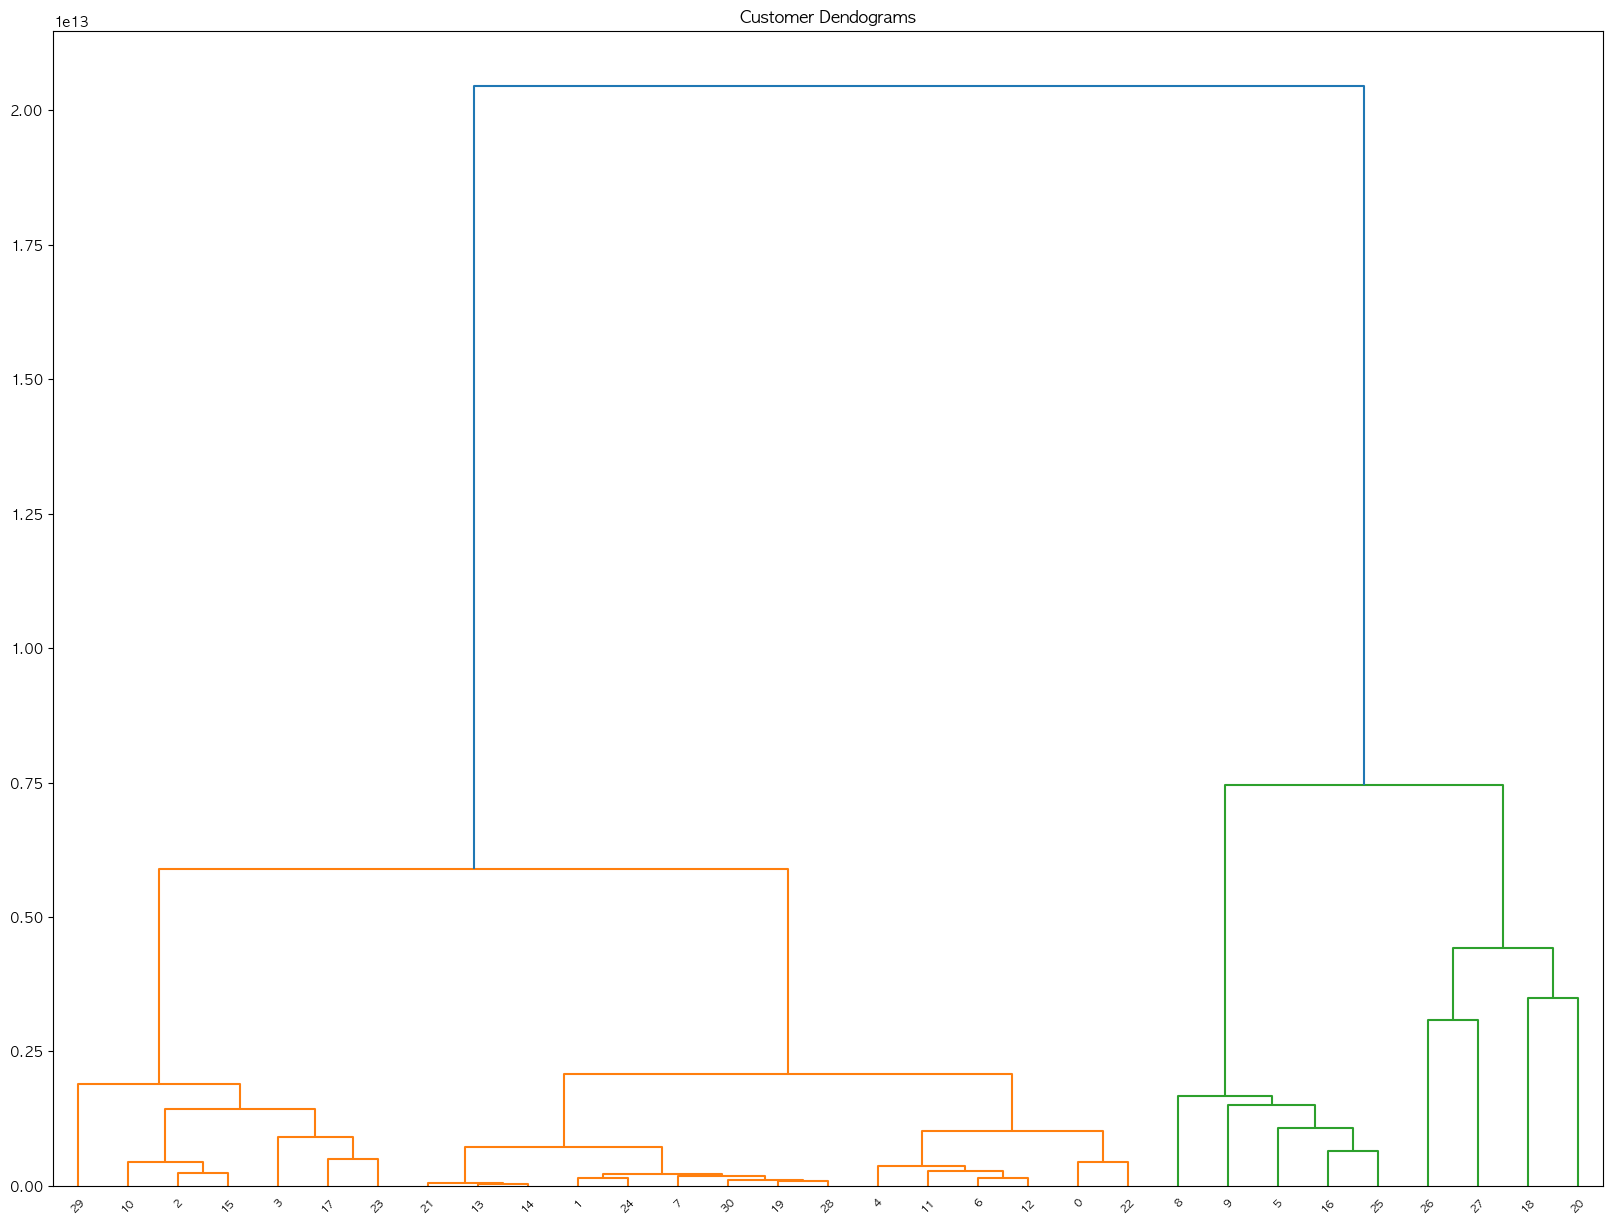

In [ ]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(20, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(retail2, method='ward'))



cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(retail2)

In [ ]:
service=df2021[(df2021['서비스_업종_코드_명']=='일반교습학원')|
(df2021['서비스_업종_코드_명']=='외국어학원')|
(df2021['서비스_업종_코드_명']=='예술학원')|
(df2021['서비스_업종_코드_명']=='스포츠 강습')|
(df2021['서비스_업종_코드_명']=='일반의원')|
(df2021['서비스_업종_코드_명']=='치과의원')|
(df2021['서비스_업종_코드_명']=='한의원')|
(df2021['서비스_업종_코드_명']=='당구장')|
(df2021['서비스_업종_코드_명']=='골프연습장')|
(df2021['서비스_업종_코드_명']=='PC방')|
(df2021['서비스_업종_코드_명']=='스포츠클럽')|
(df2021['서비스_업종_코드_명']=='자동차수리') |
(df2021['서비스_업종_코드_명']=='자동차미용')|                
(df2021['서비스_업종_코드_명']=='미용실') |
(df2021['서비스_업종_코드_명']=='네일숍') |
(df2021['서비스_업종_코드_명']=='피부관리실')| 
(df2021['서비스_업종_코드_명']=='세탁소') |
(df2021['서비스_업종_코드_명']=='가전제품수리') |
(df2021['서비스_업종_코드_명']=='부동산중개업')| 
(df2021['서비스_업종_코드_명']=='여관') |
(df2021['서비스_업종_코드_명']=='고시원')|
              (df2021['서비스_업종_코드_명']=='노래방') ]

In [ ]:
service2=service.groupby('서비스_업종_코드_명',as_index=False).sum()
service2.drop(['서비스_업종_코드_명'],axis=1,inplace=True)
service2.drop(['기준_년_코드'],axis=1,inplace=True)
service2.drop(['기준_분기_코드'],axis=1,inplace=True)
service2.drop(['상권_코드'],axis=1,inplace=True)

service3=service.groupby('서비스_업종_코드_명',as_index=False).sum()
service3

,서비스_업종_코드_명,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,PC방,3381133,4107,3528828061,356845502658,74706052,107859,59601,21526,20452,20791,20942,24456,30386,29304,16502,11196,23015,37481,55622,24063,140186,27275,13360,95256,35888,11622,8996,2555,230225390207,126620112451,45378345388,43640146140,44614154669,44741436205,51851307805,64947555696,61672556755,35144606582,24345264430,49381233960,80266585984,117128190553,50579621149,298215334505,58331769365,29852775899,207619848901,72200838741,23027557188,18474641569,5371441571,48650984,26055068,9541975,9244351,9468033,9457320,10939305,13339838,12715230,6708994,4758216,10037187,17670126,25295003,10236526,61655929,13039710,9137798,43152571,13200066,4523302,3715403,966499,8040
1,가전제품수리,1234831,1509,1280785996,65652045980,812857,52489,8651,10721,10075,11310,9528,10946,6864,1803,122,8270,19835,19270,12722,957,35131,26018,51,3774,9157,12844,16520,18846,58351200037,7300845943,13304742328,10860052994,11951020134,10934574748,11300809833,6177618192,1123227751,140313825,10898599506,22046397392,21466618943,10695012460,405103854,29603893995,24384357839,108881817,4259974735,9049068566,13191572799,14392060518,12987734140,708844,104013,150044,139495,137328,137234,144743,83658,20355,1170,148692,264361,266746,125495,6393,414624,317668,4128,69304,129840,172913,174568,181592,1982
2,고시원,596195,736,613518929,25847362505,716634,22709,6801,5131,4670,4004,4678,4239,2921,3877,162,3186,6341,6477,10299,3054,18403,11104,123,4449,6082,7336,6202,5322,20093372121,5753990384,4315901758,4253886895,3294874916,4401271041,3827437511,2917631420,2836358964,410326890,2406558325,6140391951,5435574039,8301029375,3153481925,16281243380,8449798551,92803921,4202664408,5118333032,6472775104,4911391684,3933073786,573151,143483,111183,112310,115083,116556,118019,78364,65119,45828,94726,196224,114785,170774,94297,495277,199043,10309,177931,197007,161477,99542,48055,809
3,골프연습장,2639426,3269,2742025814,230873254356,4898781,88431,42293,19409,18483,16559,17002,17181,22109,20248,1234,6765,18955,29153,54385,20411,98743,31981,49,7151,27106,40072,41040,15491,156937440312,73935814044,33411461869,31091241404,31200249843,30461798288,30772688908,37967035399,35968778645,2686585463,20919821392,37181736897,50203412059,87752686092,32129012453,155536275559,51610966363,86481061,10924252642,46433907131,66064076598,59781404223,23858052566,3093950,1804831,596098,592632,633039,618691,653490,900979,903852,53326,384900,894968,1078262,1757607,729718,3703974,852589,5611,229674,954323,1498097,1360971,507985,7216
4,네일숍,3158823,3874,3286765418,56924002210,696236,119781,36649,23324,22865,23213,24836,25810,28062,8610,234,2357,34601,51554,61207,6588,22052,134372,842,25695,41792,40215,30705,17322,41123252186,15800750024,7594844003,7879931627,8268811875,8277921503,9101743178,10430897856,5369852168,91384894,590722208,12505765177,18099548174,23460908672,2175673085,8642112848,47349121876,216663114,10464198097,17362433940,13801453544,8981746134,5164456685,529720,166516,97011,97272,105121,110427,119889,115813,50703,777,16283,164212,216873,277194,20897,107459,583161,6670,183251,222300,134579,95500,48352,8168
5,노래방,7077542,8759,7392587

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

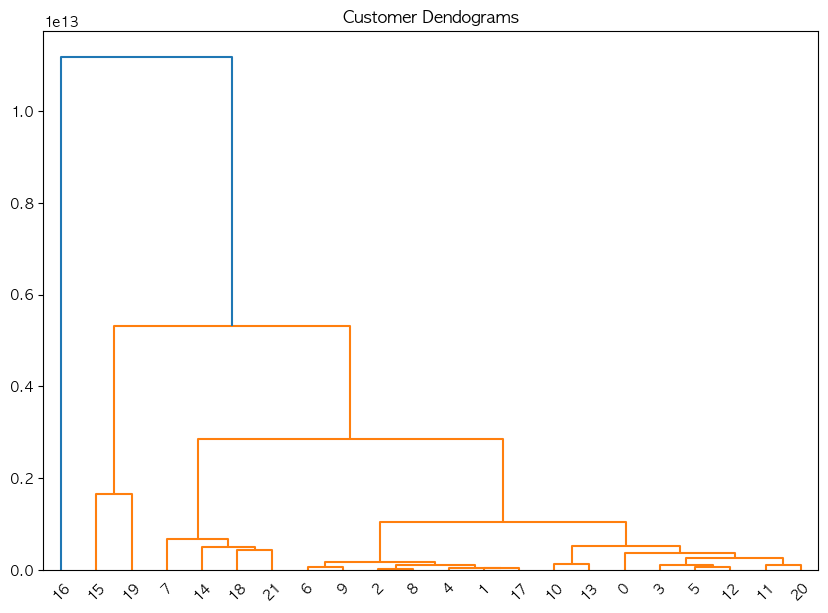

In [ ]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(service2, method='ward'))



cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(service2)